In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from io import StringIO

In [2]:
tae_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
r = requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
r.status_code

200

In [4]:
ip_df = pd.read_csv(StringIO(r.text), sep='\t')

In [5]:
df_tweet_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line.strip())
        tweet = {
            'tweet_id': data['id'],
            'retweet_count': data['retweet_count'],
            'favorite_count': data['favorite_count']
        }
        df_tweet_list.append(tweet)
        
tweet_df = pd.DataFrame(df_tweet_list)

In [6]:
tae_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
tae_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
tae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
tae_df.shape

(2356, 17)

In [10]:
tae_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
tae_df.duplicated().sum()

0

In [12]:
tae_df[tae_df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [13]:
tae_df.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [14]:
tae_df['expanded_urls'].isnull().sum()

59

In [15]:
tae_df['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [16]:
tae_df['rating_denominator'].where(tae_df['rating_denominator']>10).any()

True

In [17]:
tae_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
ip_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
ip_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
ip_df.shape

(2075, 12)

In [21]:
ip_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
ip_df.duplicated().sum()

0

In [24]:
ip_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [25]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [26]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [27]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [28]:
tweet_df.shape

(2354, 3)

In [29]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [30]:
tweet_df.duplicated().sum()

0

# Quality:-
1. No use of retweets columns.
2. Timestamp should be datetime instead of object 
3. tweet_id should be in string instead of integer
4. in_reply_to_status_id, in_reply_to_user_id, expanded_urls have null values.
5. Name column have invalid names i.e 'a','an','the'
6. In rating_denominator column some values are more than 10.
7. we don't need source column from tae_df table(most of the source information is repitative).
8. p1, p2 & p3 have invalid dog names(otherthan dog breed names) like 'orange','bagel','toilet paper' and in p1_dog, p2_dog, p3_dog contains false , which means they are not usefull.
9. We don't need img_num column in ip_df table.

# Tidiness:-
1. Dog stages should be in the same column.
2. retweet_count and favorite_count columns should be in twitter-archive-enhanced table.

In [31]:
tae_clean = tae_df.copy()
ip_clean = ip_df.copy()
tweet_clean =tweet_df.copy()

# Quality

1. No use of retweets columns.

Define:- Remove retweets rows and columns 

Code:-

In [32]:
retweets_index = list(tae_clean[tae_clean["retweeted_status_id"].notnull()].index)
tae_clean.drop(index=retweets_index, inplace=True)

In [33]:
columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
tae_clean.drop(columns=columns, axis = 1, inplace = True)

Test:-

In [34]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

2. Timestamp should be datetime instead of object.

Define:- Timestamp should be changed tp datetime type.

Code:-

In [35]:
tae_clean["timestamp"] = tae_clean["timestamp"].apply(pd.to_datetime)

Test:-

In [36]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

3. tweet_id should be in string insted of integer

Define:- tweet_id in all three tables should be changed to string.

Code:- 

In [37]:
tae_clean["tweet_id"] = tae_clean["tweet_id"].apply(str)
ip_clean["tweet_id"] = ip_clean["tweet_id"].apply(str)
tweet_clean["tweet_id"] = tweet_clean["tweet_id"].apply(str)

Test:-

In [38]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

In [39]:
ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [40]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


4. in_reply_to_status_id, in_reply_to_user_id, expanded_urls have null values.

Define:- we cannot find none values for in_reply_to_status_id, in_reply_to_user_id columns. so, we drop those two columns. expanded_urls also have none values, which means no image. now we have to drop off rows which have none values from expanded_urls column.

Code:-

In [41]:
expanded_urls_index = list(tae_clean[tae_clean["expanded_urls"].isnull()].index)
tae_clean.drop(index=expanded_urls_index, inplace=True)

In [42]:
column = ['in_reply_to_status_id', 'in_reply_to_user_id']
tae_clean.drop(columns=column, axis = 1, inplace = True)

Test:-

In [43]:
tae_clean["expanded_urls"].isnull().sum()

0

In [44]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

5. Name column have invalid names i.e 'a', 'an','the'

Define:- In the name column, they are invalid names in the lowercase letter words. we should replace those words with none.

Code:-

In [45]:
wrong_name = (tae_clean[tae_clean.name.str.islower()].name).index
tae_clean.loc[wrong_name,'name'] = 'None'

Test:-

In [46]:
tae_clean.name.value_counts()

None          726
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

6. In rating_denominator column some values are more than 10.

Define:-Delect the rows, in which denominater is more than 10.

Code:-

In [47]:
denominater = list(tae_clean.query("rating_denominator != 10").index)
tae_clean.drop(index=denominater, inplace=True)

Test:-

In [48]:
tae_clean.query("rating_denominator != 10").index

Int64Index([], dtype='int64')

7. we dont need source column from tae_df table(most of the source information is repitative).

Define:-Delect source column.

Code:-

In [49]:
tae_clean.drop(columns='source', axis = 1, inplace = True)

Test:-

In [50]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2099 non-null   object             
 1   timestamp           2099 non-null   datetime64[ns, UTC]
 2   text                2099 non-null   object             
 3   expanded_urls       2099 non-null   object             
 4   rating_numerator    2099 non-null   int64              
 5   rating_denominator  2099 non-null   int64              
 6   name                2099 non-null   object             
 7   doggo               2099 non-null   object             
 8   floofer             2099 non-null   object             
 9   pupper              2099 non-null   object             
 10  puppo               2099 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 196.8+ KB


8. p1, p2 & p3 have invalid dog names(otherthan dog breed names) like 'orange','bagel','toilet paper' and in p1_dog, p2_dog, p3_dog contains false , which means they are not usefull.

Define:-find rows that have invalid dog names and three false and delect them.

Code:-

In [51]:
false_dog_names = list(ip_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
ip_clean.drop(false_dog_names,inplace=True)

Test:-

In [52]:
ip_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index

Int64Index([], dtype='int64')

9. We dont need img_num column in ip_df table.

Define:-Delect img_num column.

Code:-

In [53]:
ip_clean.drop(columns='img_num', axis = 1, inplace = True)

Test:-

In [54]:
ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   p1        1751 non-null   object 
 3   p1_conf   1751 non-null   float64
 4   p1_dog    1751 non-null   bool   
 5   p2        1751 non-null   object 
 6   p2_conf   1751 non-null   float64
 7   p2_dog    1751 non-null   bool   
 8   p3        1751 non-null   object 
 9   p3_conf   1751 non-null   float64
 10  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 128.2+ KB


# Tidiness

1. Dog stages should be in the same column.

Define:- Change dog stages into one column and delect original columns.

Code:-

In [55]:
tae_clean['stage'] = tae_clean.doggo.astype(str) + ', ' +tae_clean.floofer.astype(str) + ', ' +tae_clean.pupper.astype(str) + ', '+tae_clean.puppo.astype(str)

In [56]:
tae_clean.stage.value_counts()

None, None, None, None        1761
None, None, pupper, None       222
doggo, None, None, None         72
None, None, None, puppo         23
doggo, None, pupper, None       10
None, floofer, None, None        9
doggo, None, None, puppo         1
doggo, floofer, None, None       1
Name: stage, dtype: int64

In [57]:
def stage_cleaner(s):
    l = [item for item in s.split(", ") if item != 'None']
    return 'None' if not l else " ".join(l)

tae_clean['stage'] = tae_clean['stage'].apply(stage_cleaner)

In [58]:
tae_clean.stage.value_counts()

None             1761
pupper            222
doggo              72
puppo              23
doggo pupper       10
floofer             9
doggo puppo         1
doggo floofer       1
Name: stage, dtype: int64

In [59]:
col = ['pupper','doggo','floofer','puppo']
tae_clean.drop(columns=col, axis = 1, inplace = True)

Test:-

In [60]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2099 non-null   object             
 1   timestamp           2099 non-null   datetime64[ns, UTC]
 2   text                2099 non-null   object             
 3   expanded_urls       2099 non-null   object             
 4   rating_numerator    2099 non-null   int64              
 5   rating_denominator  2099 non-null   int64              
 6   name                2099 non-null   object             
 7   stage               2099 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 147.6+ KB


2. retweet_count and favorite_count columns should be in twitter-archive-enhanced table.

Define:- merge two tables into one.

Code:-

In [61]:
tae_clean = pd.merge(tae_clean,tweet_clean,on=['tweet_id'], how='left')

In [62]:
tae_clean_df = pd.merge(tae_clean,ip_clean,on=['tweet_id'], how='left')

Test:-

In [63]:
tae_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2098
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2099 non-null   object             
 1   timestamp           2099 non-null   datetime64[ns, UTC]
 2   text                2099 non-null   object             
 3   expanded_urls       2099 non-null   object             
 4   rating_numerator    2099 non-null   int64              
 5   rating_denominator  2099 non-null   int64              
 6   name                2099 non-null   object             
 7   stage               2099 non-null   object             
 8   retweet_count       2099 non-null   int64              
 9   favorite_count      2099 non-null   int64              
 10  jpg_url             1669 non-null   object             
 11  p1                  1669 non-null   object             
 12  p1_conf             1669 non-null 

In [64]:
tae_clean_df.to_csv('twitter_archive_master.csv')

# Analysis and  visualization:-

Insights:-
1. which stage of dogs have average highest retweet and favorite count?
2. which dog type is the most common dog that has been rated?
3. what is the relation between number of tweets and number of favorites?

1. which stage of dogs have average highest retweet and favorite count?

In [65]:
avg_retweet_count = tae_clean_df.groupby('stage', as_index=False)['retweet_count'].mean()
avg_retweet_count

,stage,retweet_count
0,None,2648.153322
1,doggo,6610.361111
2,doggo floofer,3433.000000
3,doggo pupper,3971.200000
4,doggo puppo,19196.000000
5,floofer,4155.888889
6,pupper,2470.558559
7,puppo,6600.043478


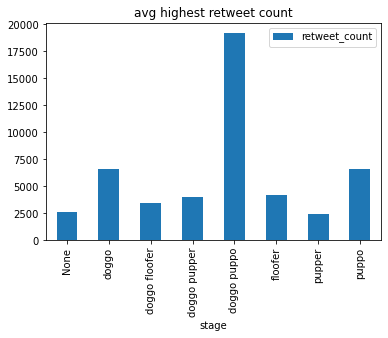

In [66]:
avg_retweet_count.plot.bar(x="stage",y="retweet_count",title="avg highest retweet count");

In [67]:
avg_favorite_count = tae_clean_df.groupby('stage', as_index=False)['favorite_count'].mean()
avg_favorite_count

,stage,favorite_count
0,None,8588.341851
1,doggo,18060.194444
2,doggo floofer,17169.000000
3,doggo pupper,12077.100000
4,doggo puppo,47844.000000
5,floofer,11064.444444
6,pupper,7214.819820
7,puppo,21622.565217


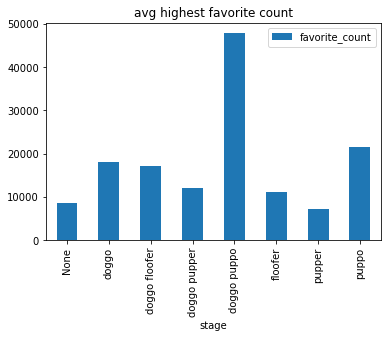

In [68]:
avg_favorite_count.plot.bar(x="stage",y="favorite_count",title="avg highest favorite count");

2. which dog type is the most common dog that has been rated?

In [69]:
tae_clean_df['p1'].value_counts()

golden_retriever            135
Labrador_retriever           92
Pembroke                     88
Chihuahua                    79
pug                          54
                           ... 
cup                           1
rapeseed                      1
sulphur-crested_cockatoo      1
conch                         1
hay                           1
Name: p1, Length: 214, dtype: int64

3. what is the relation between number of tweets and number of favourites?

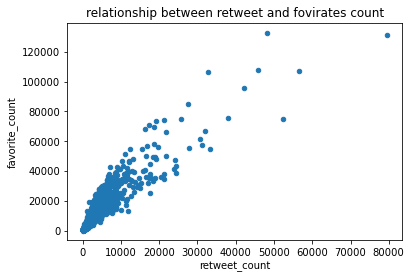

In [70]:
tae_clean_df.plot.scatter(x='retweet_count',y='favorite_count',title='relationship between retweet and fovirates count');

In [71]:
cor = tae_clean_df['retweet_count'].corr(tae_clean_df['favorite_count'])
cor

0.9112017295184941